# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [586]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [587]:
# Your code here
num_rows = 100000
data = pd.read_csv('Fraud.csv', nrows=num_rows)

In [588]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### What is the distribution of the outcome? 

In [589]:
# Your response here
data['isFraud'].value_counts()

0    99884
1      116
Name: isFraud, dtype: int64

### Clean the dataset. Pre-process it to make it suitable for ML training. Feel free to explore, drop, encode, transform, etc. Whatever you feel will improve the model score.

In [590]:
# Your code here
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [591]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,8.499640,1.736022e+05,8.777575e+05,8.940619e+05,8.805048e+05,1.184041e+06,0.001160,0.0
std,1.825545,3.443003e+05,2.673284e+06,2.711318e+06,2.402267e+06,2.802350e+06,0.034039,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.274552e+04,2.006150e+04,0.000000e+00,2.083943e+04,4.990918e+04,0.000000,0.0
75%,10.000000,2.117631e+05,1.901920e+05,2.148132e+05,5.882724e+05,1.058186e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,0.0


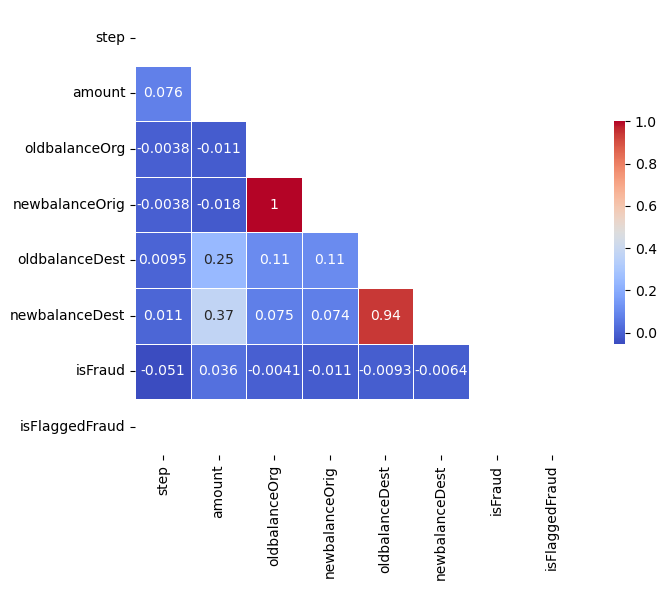

In [592]:
corr = data.select_dtypes(include=['int64', 'float64']).corr()
#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = 'coolwarm'

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, cmap=cmap, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [593]:
data['newbalanceDest-oldbalanceDest'] = data['newbalanceDest']- data['oldbalanceDest']
data['newbalanceOrg-oldbalanceOrg'] = data['newbalanceOrig']- data['oldbalanceOrg']

In [594]:
#drop 'oldbalanceOrg' column because of the high collinearity with 'newbalanceOrig'.
#drop 'oldbalanceDest' column because of the high collinearity with 'newbalanceDest'.

data.drop(columns=['oldbalanceOrg','oldbalanceDest'], inplace = True)

In [595]:
data.dtypes

step                               int64
type                              object
amount                           float64
nameOrig                          object
newbalanceOrig                   float64
nameDest                          object
newbalanceDest                   float64
isFraud                            int64
isFlaggedFraud                     int64
newbalanceDest-oldbalanceDest    float64
newbalanceOrg-oldbalanceOrg      float64
dtype: object

In [596]:
data['step'].value_counts()

9     37628
10    27274
8     21097
7      6837
1      2708
6      1660
2      1014
5       665
4       565
3       552
Name: step, dtype: int64

In [597]:
data['step'] = data['step'].astype(str)

In [598]:
data['type'].value_counts()

PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: type, dtype: int64

In [599]:
data['nameOrig'].value_counts()

C1231006815    1
C1407775146    1
C1802124274    1
C1910868687    1
C579725406     1
              ..
C668560116     1
C986934168     1
C1567015632    1
C1280981431    1
C1868032458    1
Name: nameOrig, Length: 100000, dtype: int64

In [600]:
data['nameDest'].value_counts()

C985934102     78
C1286084959    72
C248609774     71
C1590550415    69
C2083562754    66
               ..
M259075709      1
M375566378      1
M1225444842     1
M1709995863     1
M1419201886     1
Name: nameDest, Length: 51551, dtype: int64

In [601]:
data['nameDest-is Fraud'] = data.groupby('nameDest')['isFraud'].transform('mean')


In [602]:
data['nameDest'] = data['nameDest'].astype(str).str.replace('C', '').str.replace('M', '').astype(int)

In [603]:
data['isFlaggedFraud'].value_counts()

0    100000
Name: isFlaggedFraud, dtype: int64

In [604]:
data.drop(columns=['nameOrig','isFlaggedFraud'], inplace=True)

In [605]:
data_dummy = pd.get_dummies(data)

In [606]:
data_dummy.head()

,amount,newbalanceOrig,nameDest,newbalanceDest,isFraud,newbalanceDest-oldbalanceDest,newbalanceOrg-oldbalanceOrg,nameDest-is Fraud,step_1,step_10,...,step_5,step_6,step_7,step_8,step_9,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,160296.36,1979787155,0.0,0,0.0,-9839.64,0.000000,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1864.28,19384.72,2044282225,0.0,0,0.0,-1864.28,0.000000,1,0,...,0,0,0,0,0,0,0,0,1,0
2,181.00,0.00,553264065,0.0,1,0.0,-181.00,0.142857,1,0,...,0,0,0,0,0,0,0,0,0,1
3,181.00,0.00,38997010,0.0,1,-21182.0,-181.00,0.200000,1,0,...,0,0,0,0,0,0,1,0,0,0
4,11668.14,29885.86,1230701703,0.0,0,0.0,-11668.14,0.000000,1,0,...,0,0,0,0,0,0,0,0,1,0


In [607]:
from sklearn.model_selection import train_test_split

X = data_dummy.drop(columns='isFraud')
y = data_dummy['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [608]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Run a logisitc regression classifier and evaluate its accuracy.

In [609]:
# Your code here
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)


In [610]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print('confusion matrix :\n', confusion_matrix(y_test,y_pred))

precision:  0.7894736842105263
recall:  0.6
confusion matrix :
 [[19971     4]
 [   10    15]]


### Now pick a model of your choice and evaluate its accuracy.

### Oversampling

In [611]:
# Your code here

from sklearn.utils import resample


y_train.reset_index(drop=True, inplace=True)



X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.reset_index(drop=True, inplace=True)


train = pd.concat([X_train_scaled, y_train], axis=1)

not_fraud = train[train['isFraud']==0]
is_fraud = train[train['isFraud']==1]

In [612]:
oversampled = resample(is_fraud,
                              replace=True, # sample with replacement
                              n_samples=len(not_fraud), # match number in majority class
                              random_state=1)

# Combine majority class with upsampled minority class
oversampled = pd.concat([not_fraud, oversampled])

# Check the class distribution
oversampled['isFraud'].value_counts()

0    79909
1    79909
Name: isFraud, dtype: int64

In [613]:
y_train_over = oversampled['isFraud'].copy()
X_train_over = oversampled.drop('isFraud',axis = 1).copy()

logreg_over = LogisticRegression(max_iter=1000)
logreg_over.fit(X_train_over, y_train_over)
pred = logreg_over.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print('confusion matrix :\n', confusion_matrix(y_test,pred))

precision:  0.23711340206185566
recall:  0.92
confusion matrix :
 [[19901    74]
 [    2    23]]


/Users/bernaozer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Undersampling

In [614]:

undersampled = resample(not_fraud,
                              replace=True, # sample with replacement
                              n_samples=len(is_fraud), # match number in majority class
                              random_state=1)


undersampled = pd.concat([is_fraud, undersampled])

undersampled['isFraud'].value_counts()

1    91
0    91
Name: isFraud, dtype: int64

In [615]:
y_train_under = undersampled['isFraud'].copy()
X_train_under = undersampled.drop('isFraud',axis = 1).copy()

logreg_under = LogisticRegression()
logreg_under.fit(X_train_under, y_train_under)
pred = logreg_under.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print('confusion matrix :\n', confusion_matrix(y_test,pred))

precision:  0.12437810945273632
recall:  1.0
confusion matrix :
 [[19799   176]
 [    0    25]]


/Users/bernaozer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### DecisionTree Regression

In [616]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg = tree_reg .fit(X_train_scaled, y_train)
pred = tree_reg.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print('confusion matrix :\n', confusion_matrix(y_test,pred))

precision:  0.8333333333333334
recall:  0.8
confusion matrix :
 [[19971     4]
 [    5    20]]


/Users/bernaozer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### DecisionTree Regression with Oversampling

In [617]:
tree_reg_over = DecisionTreeRegressor()
tree_reg_over = tree_reg_over.fit(X_train_over, y_train_over)
pred = tree_reg_over.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print('confusion matrix :\n', confusion_matrix(y_test,pred))

precision:  0.9090909090909091
recall:  0.8
confusion matrix :
 [[19973     2]
 [    5    20]]


/Users/bernaozer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### Which model worked better and how do you know?

In [618]:
# Your response here
#After data engineering, I got the best precision and recall score with DecisionTree regression model with oversampling.

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.